<a href="https://colab.research.google.com/github/Abiramianbarasan/Road-accident-risk-prediction-system-using-machine-learning/blob/main/datapreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Essential Libraries
import pandas as pd
import numpy as np

# Data Imputation (Advanced)
from sklearn.impute import KNNImputer, SimpleImputer

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Data Visualization
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/accident_data.csv")

# Display basic info
print("Before Cleaning:")
print(df.info())
print("\nMissing Values Before Cleaning:\n", df.isnull().sum())


Before Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26001 entries, 0 to 26000
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               26001 non-null  object 
 1   1st_Road_Class                               26001 non-null  object 
 2   1st_Road_Number                              26001 non-null  int64  
 3   2nd_Road_Class                               14582 non-null  object 
 4   2nd_Road_Number                              25711 non-null  float64
 5   Accident_Severity                            26001 non-null  object 
 6   Carriageway_Hazards                          558 non-null    object 
 7   Date                                         26001 non-null  object 
 8   Day_of_Week                                  26001 non-null  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  26001 non-

In [ ]:
print("Before Cleaning:\n", df.describe())


Before Cleaning:
        1st_Road_Number  2nd_Road_Number  \
count     26001.000000     25711.000000   
mean        982.875812       435.147058   
std        1789.917052      1446.424444   
min           0.000000         0.000000   
25%           4.000000         0.000000   
50%         158.000000         0.000000   
75%         684.000000         0.000000   
max        9999.000000      9999.000000   

       Did_Police_Officer_Attend_Scene_of_Accident      Latitude  \
count                                 26001.000000  26001.000000   
mean                                      1.093843     38.443182   
std                                       0.295545     15.552393   
min                                       1.000000      8.864452   
25%                                       1.000000     23.079915   
50%                                       1.000000     51.215177   
75%                                       1.000000     51.919388   
max                                       3.000000

In [ ]:
print("Before Cleaning:", df.shape)

Before Cleaning: (26001, 29)


In [ ]:
print("Duplicate Rows Before Cleaning:", df.duplicated().sum())


Duplicate Rows Before Cleaning: 2069


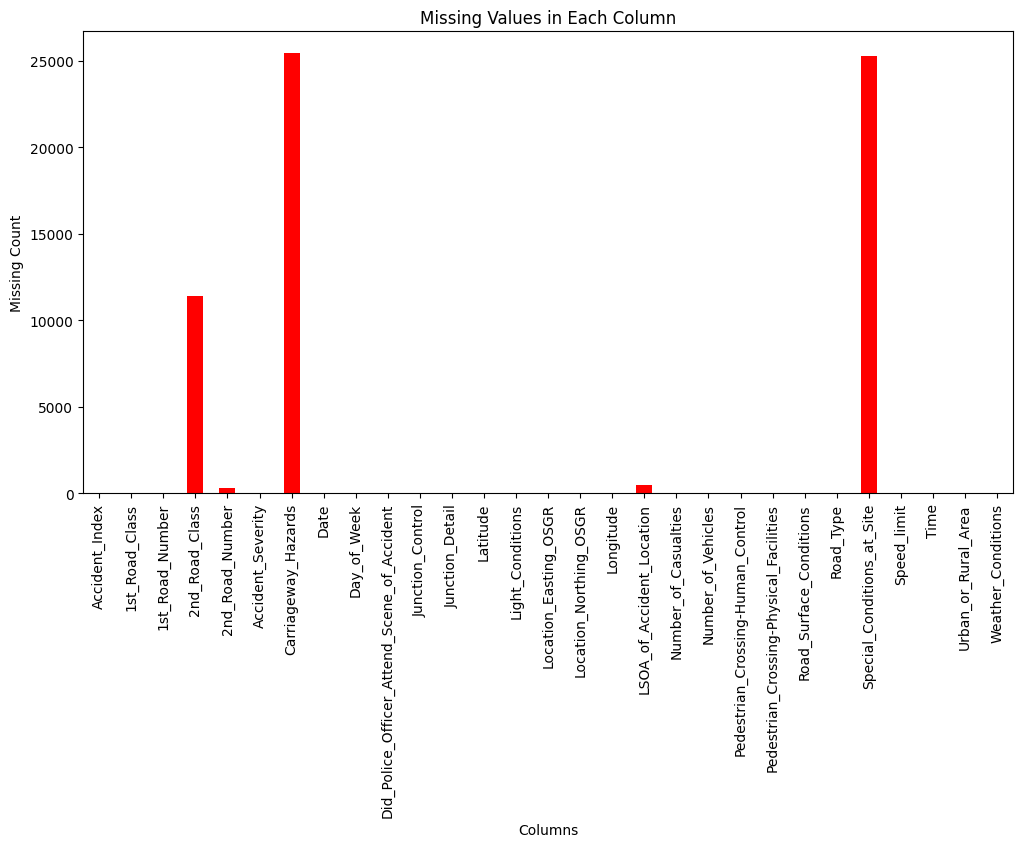

In [ ]:
plt.figure(figsize=(12,6))
df.isnull().sum().plot(kind='bar', color='red')
plt.title("Missing Values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Missing Count")
plt.xticks(rotation=90)
plt.show()


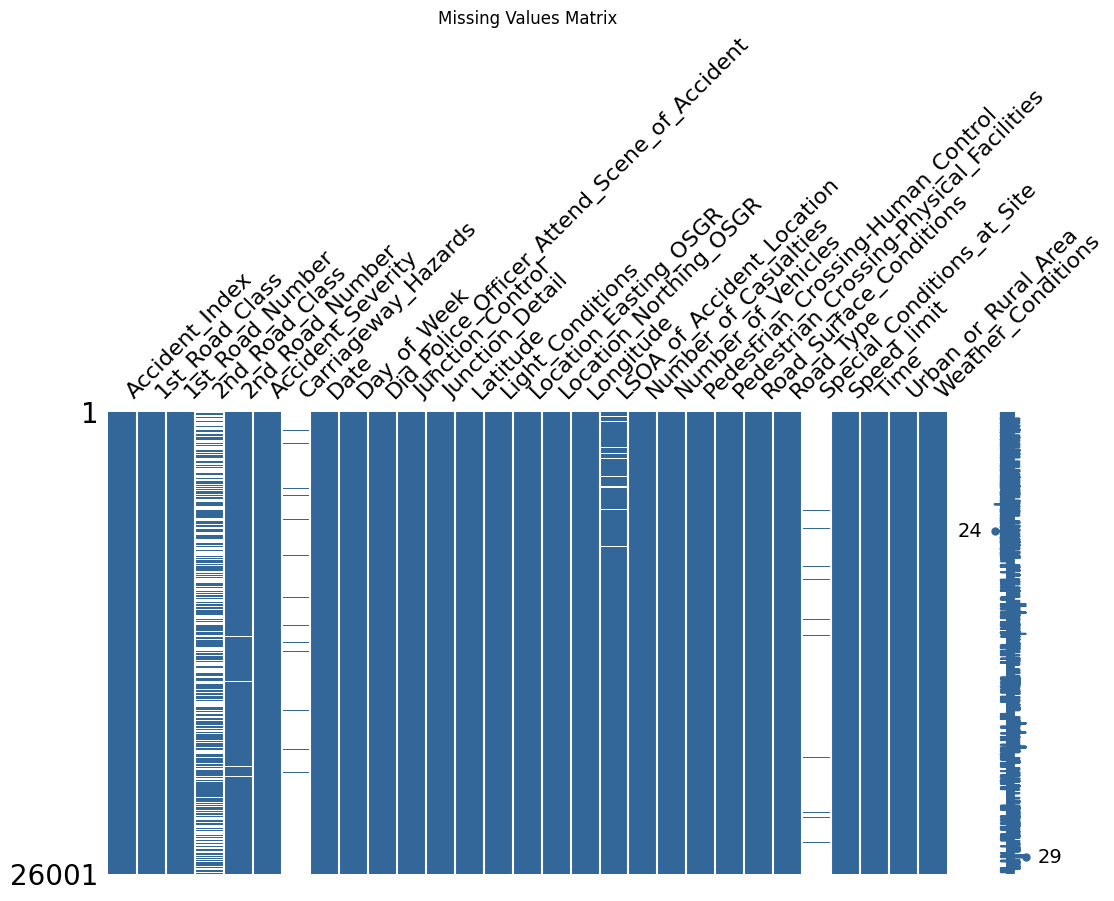

In [ ]:
msno.matrix(df, figsize=(12, 6), color=(0.2, 0.4, 0.6))
plt.title("Missing Values Matrix")
plt.show()


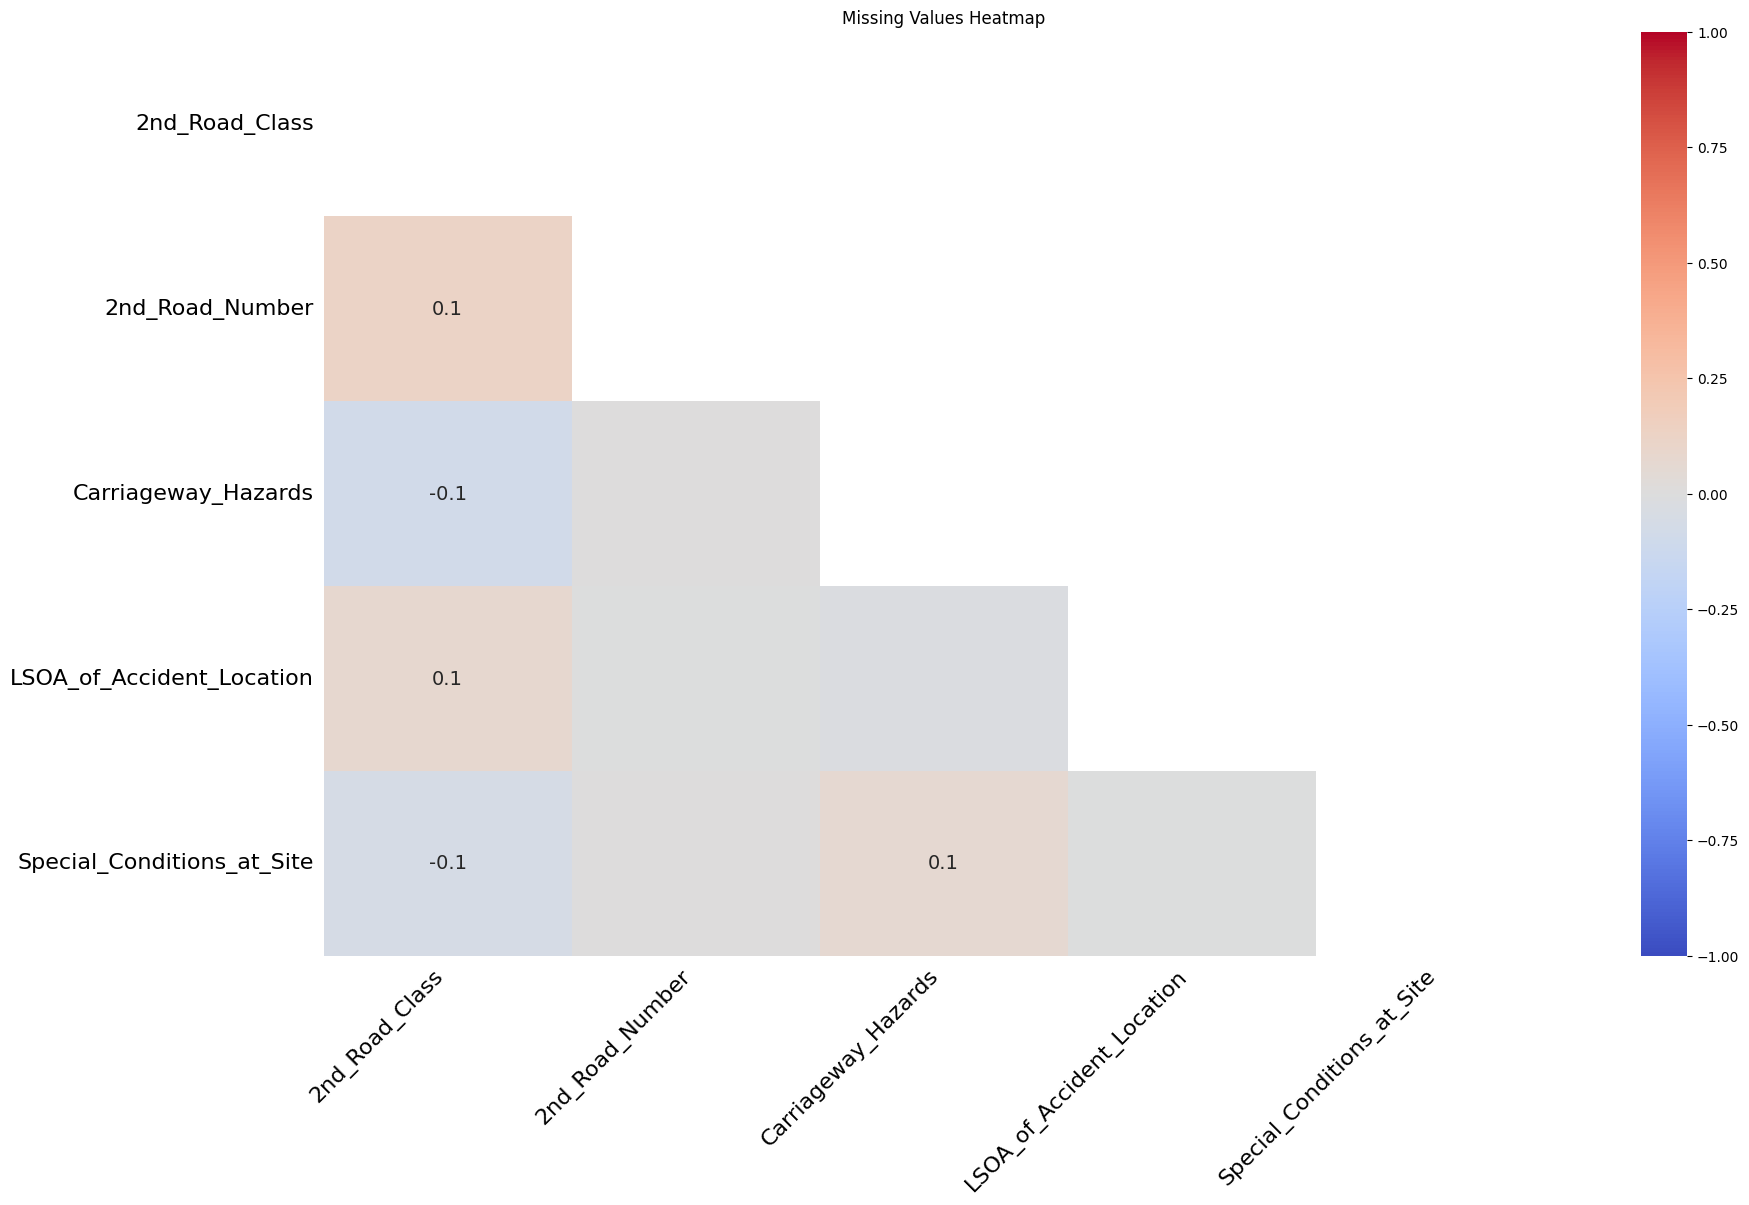

In [ ]:
msno.heatmap(df, cmap="coolwarm")
plt.title("Missing Values Heatmap")
plt.show()


In [ ]:
# Select only numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Initialize KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)  # Uses 5 nearest neighbors

# Apply KNN Imputer
df[num_cols] = knn_imputer.fit_transform(df[num_cols])

# Convert back to integer (if required)
df[num_cols] = df[num_cols].astype(int)

# Check if missing values are handled
print("\nMissing Values After KNN Imputation:\n", df.isnull().sum())



Missing Values After KNN Imputation:
 Accident_Index                                     0
1st_Road_Class                                     0
1st_Road_Number                                    0
2nd_Road_Class                                 11419
2nd_Road_Number                                    0
Accident_Severity                                  0
Carriageway_Hazards                            25443
Date                                               0
Day_of_Week                                        0
Did_Police_Officer_Attend_Scene_of_Accident        0
Junction_Control                                   0
Junction_Detail                                    0
Latitude                                           0
Light_Conditions                                   0
Location_Easting_OSGR                              0
Location_Northing_OSGR                             0
Longitude                                          0
LSOA_of_Accident_Location                        493
Number_

In [ ]:
# Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values with most frequent category (mode)
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check if missing values are handled
print("\nMissing Values After Filling Categorical Data:\n", df.isnull().sum())



Missing Values After Filling Categorical Data:
 Accident_Index                                 0
1st_Road_Class                                 0
1st_Road_Number                                0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Accident_Severity                              0
Carriageway_Hazards                            0
Date                                           0
Day_of_Week                                    0
Did_Police_Officer_Attend_Scene_of_Accident    0
Junction_Control                               0
Junction_Detail                                0
Latitude                                       0
Light_Conditions                               0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
LSOA_of_Accident_Location                      0
Number_of_Casualties                           0
Number_of_Vehicles  

<ipython-input-13-343abdbbb0a9>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [ ]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nDataset After Normalization:\n", df.head())



Dataset After Normalization:
   Accident_Index 1st_Road_Class  1st_Road_Number 2nd_Road_Class  \
0  200754AM08507              A        -0.356379   Unclassified   
1  2009559D02192              A        -0.532368   Unclassified   
2  201054MB04210       Motorway        -0.546894   Unclassified   
3  201014A194610       Motorway        -0.539072              A   
4  201014A194610       Motorway        -0.539072              A   

   2nd_Road_Number Accident_Severity  \
0        -0.303230             Fatal   
1        -0.303230             Fatal   
2        -0.303230             Fatal   
3         0.132195             Fatal   
4         0.132195             Fatal   

                               Carriageway_Hazards        Date Day_of_Week  \
0  Any animal in carriageway (except ridden horse)  28-01-2021     Tuesday   
1  Any animal in carriageway (except ridden horse)  29-11-2021    Thursday   
2  Any animal in carriageway (except ridden horse)  15-03-2021    Saturday   
3  Any animal

In [ ]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
print("\nAfter Cleaning:\n", df.describe())



After Cleaning:
        1st_Road_Number  2nd_Road_Number  \
count     23932.000000     23932.000000   
mean          0.017136         0.010188   
std           1.016394         1.021439   
min          -0.549129        -0.303230   
25%          -0.546894        -0.303230   
50%          -0.456385        -0.303230   
75%          -0.136252        -0.303230   
max           5.037271         6.607591   

       Did_Police_Officer_Attend_Scene_of_Accident      Latitude  \
count                                 23932.000000  23932.000000   
mean                                      0.004123     -0.070238   
std                                       1.006798      1.008257   
min                                      -0.317529     -1.925547   
25%                                      -0.317529     -1.025019   
50%                                      -0.317529      0.776037   
75%                                      -0.317529      0.904684   
max                                       6.449751

In [ ]:

print("After Cleaning:", df.shape)    # Shape after cleaning


After Cleaning: (23932, 29)


In [ ]:

print("Duplicate Rows After Cleaning:", df.duplicated().sum())


Duplicate Rows After Cleaning: 0


In [ ]:
# Save the cleaned dataset
df.to_csv("cleaned_accident_data.csv", index=False)  # index=False to remove row numbers
print(" Cleaned dataset saved successfully!")


 Cleaned dataset saved successfully!


In [ ]:
from google.colab import files
files.download("cleaned_accident_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

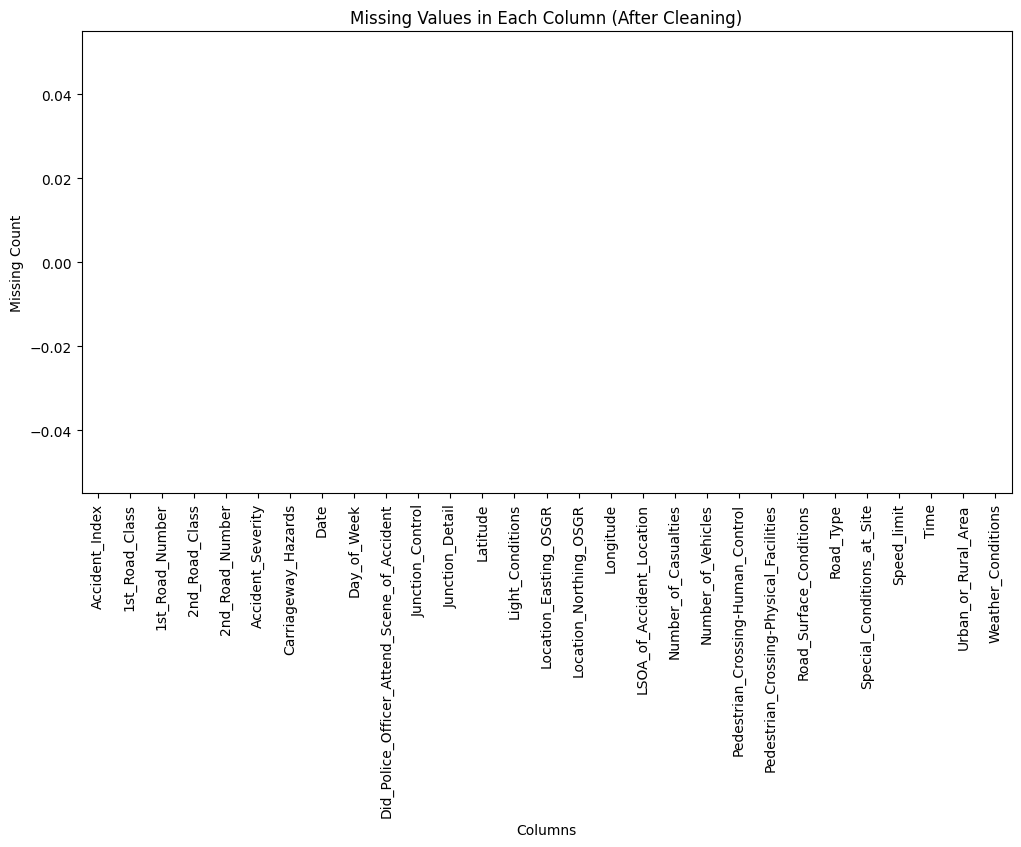

In [ ]:
plt.figure(figsize=(12,6))
df.isnull().sum().plot(kind='bar', color='green')
plt.title("Missing Values in Each Column (After Cleaning)")
plt.xlabel("Columns")
plt.ylabel("Missing Count")
plt.xticks(rotation=90)
plt.show()


<Figure size 1200x600 with 0 Axes>

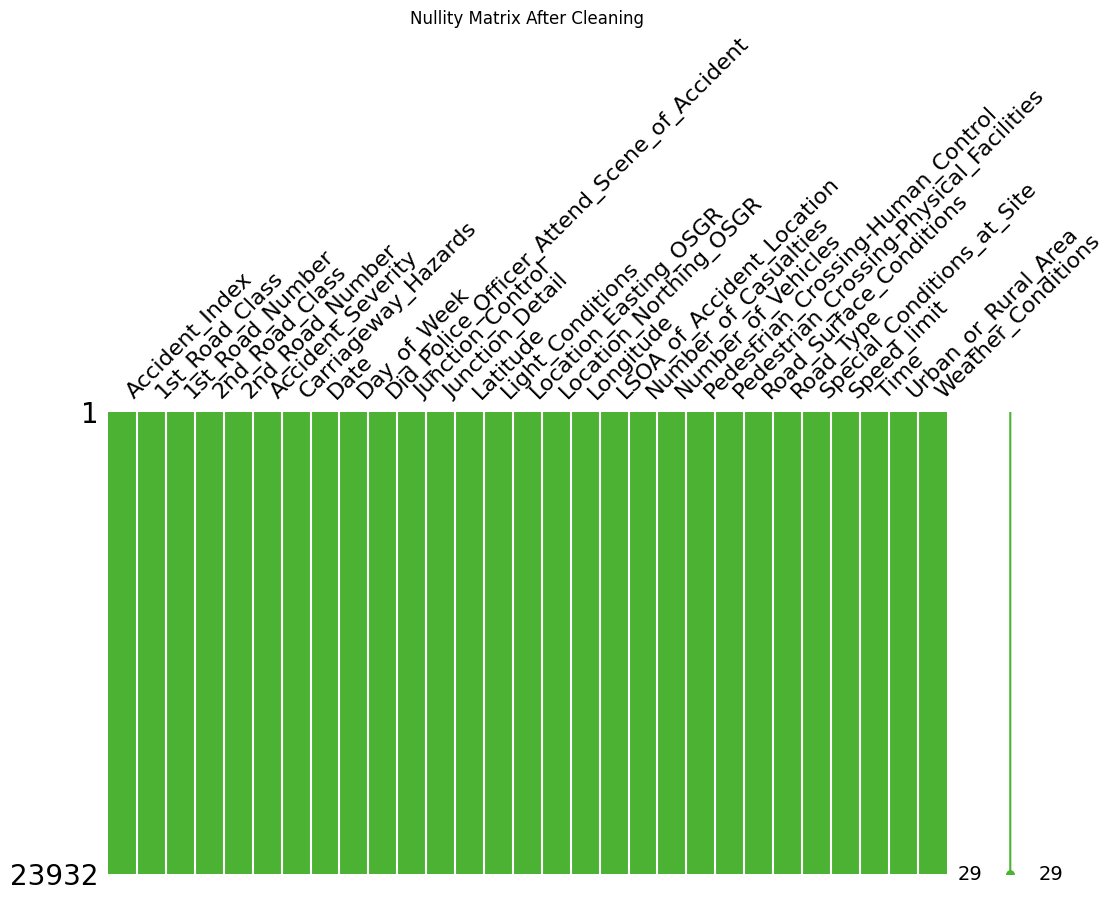

In [ ]:
plt.figure(figsize=(12,6))
msno.matrix(df, figsize=(12,6), color=(0.3, 0.7, 0.2))  # Green color for cleaned data
plt.title("Nullity Matrix After Cleaning")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Figure size 1200x600 with 0 Axes>

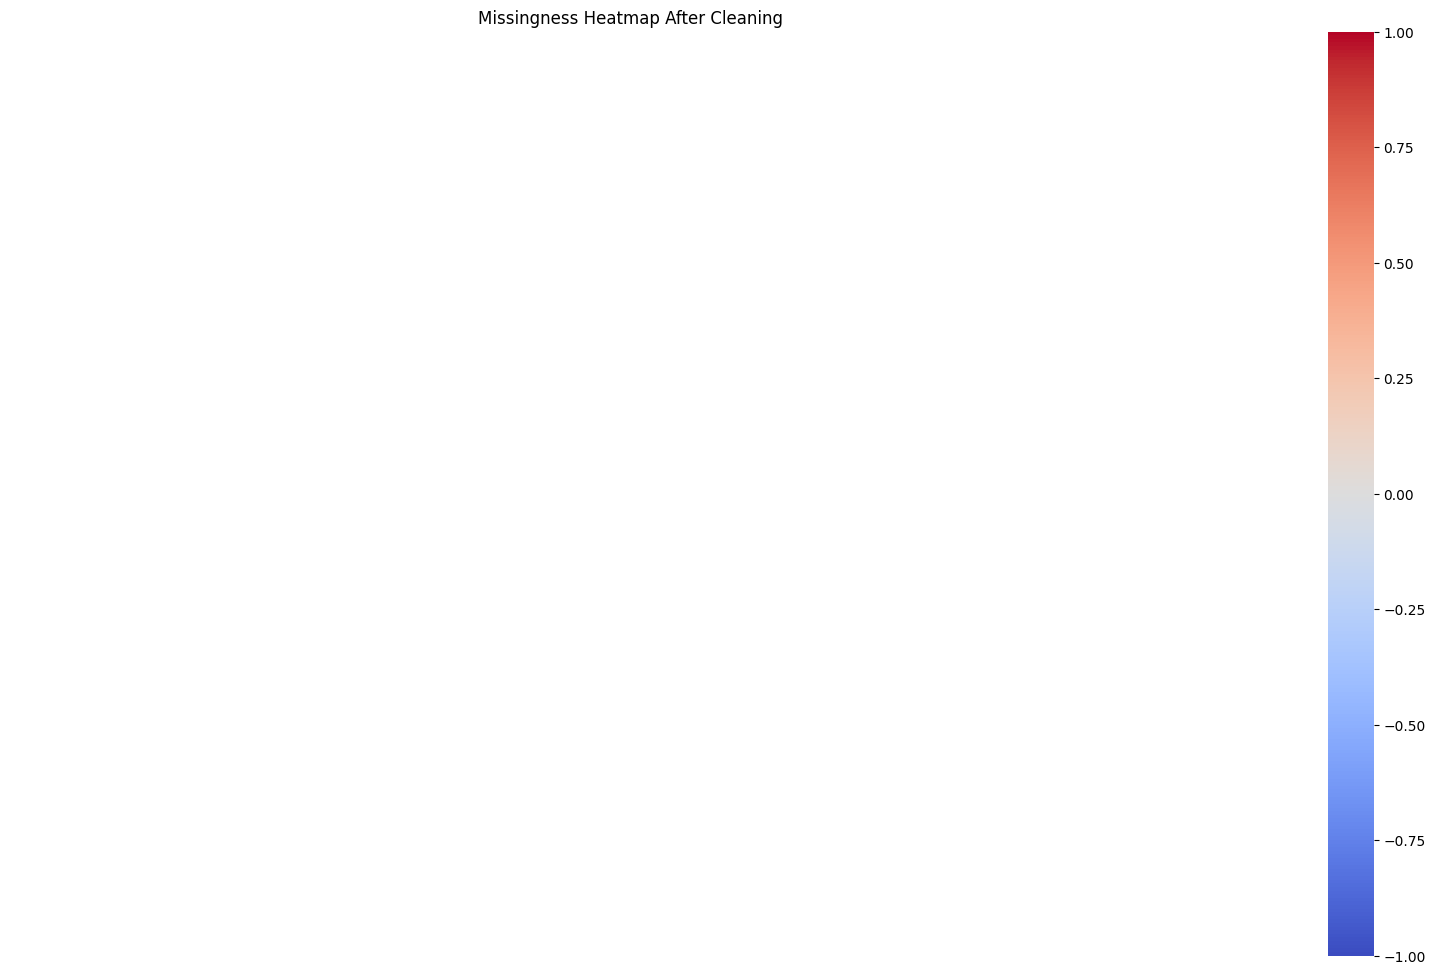

In [ ]:
plt.figure(figsize=(12,6))
msno.heatmap(df, cmap="coolwarm")
plt.title("Missingness Heatmap After Cleaning")
plt.show()
